In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Data Exploratory for Wine Data

In [13]:
winedf = pd.read_csv(r"datasets\Wine\data.csv")
winedf.head()

,type,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid+phenols,proanthocyanins,color_inten,hue,od280-od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity            178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid+phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_inten           178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280-od315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Various relation will classify the wine into their types, in this case, of this dataset -> 1,2 and 3. We will look into the correlation of all attributes.

2    71
1    59
3    48
Name: type, dtype: int64


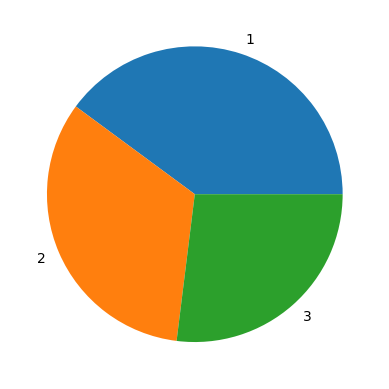

In [15]:
print(winedf["type"].value_counts())
plt.pie(winedf['type'].value_counts(), labels = ["1" , "2","3"])
plt.show()

### Correlation of Wine Dataset

In [16]:
winedf.corr()

,type,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid+phenols,proanthocyanins,color_inten,hue,od280-od315,proline
type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid+phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot: >

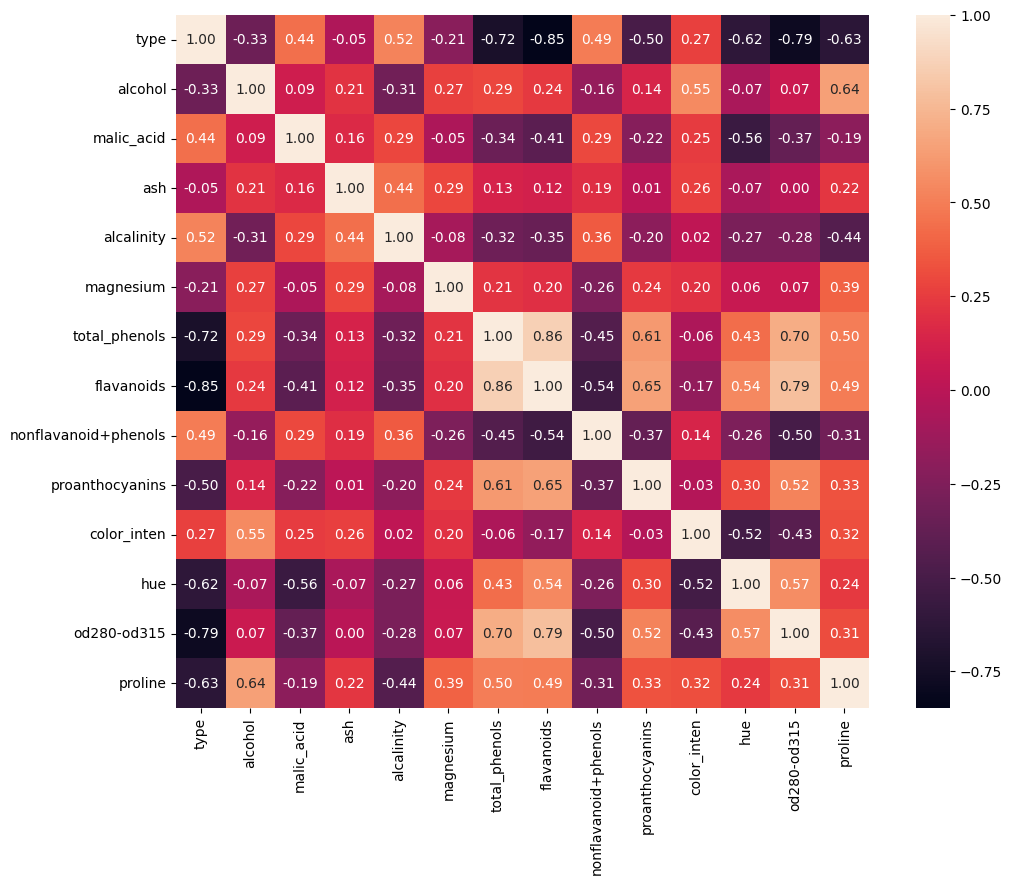

In [17]:
wcorr = winedf.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(wcorr, vmax= 1, annot = True, square = True, fmt= ".2f")

Omitting Column which have negative correlation with type.

In [18]:
winedf2 = winedf[['type','alcalinity','malic_acid','nonflavanoid+phenols','color_inten']]
winedf2.head()

,type,alcalinity,malic_acid,nonflavanoid+phenols,color_inten
0,1,15.6,1.71,0.28,5.64
1,1,11.2,1.78,0.26,4.38
2,1,18.6,2.36,0.30,5.68
3,1,16.8,1.95,0.24,7.80
4,1,21.0,2.59,0.39,4.32


In [67]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('type')
    df['type'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return(record_list)

In [68]:
wine_list = extract_df_col(winedf2)
with open("datasets\Wine\cleaned_attributes.txt", "w") as output:
    output.write(str(wine_list))


['alcalinity', 'malic_acid', 'nonflavanoid+phenols', 'color_inten', 'type']


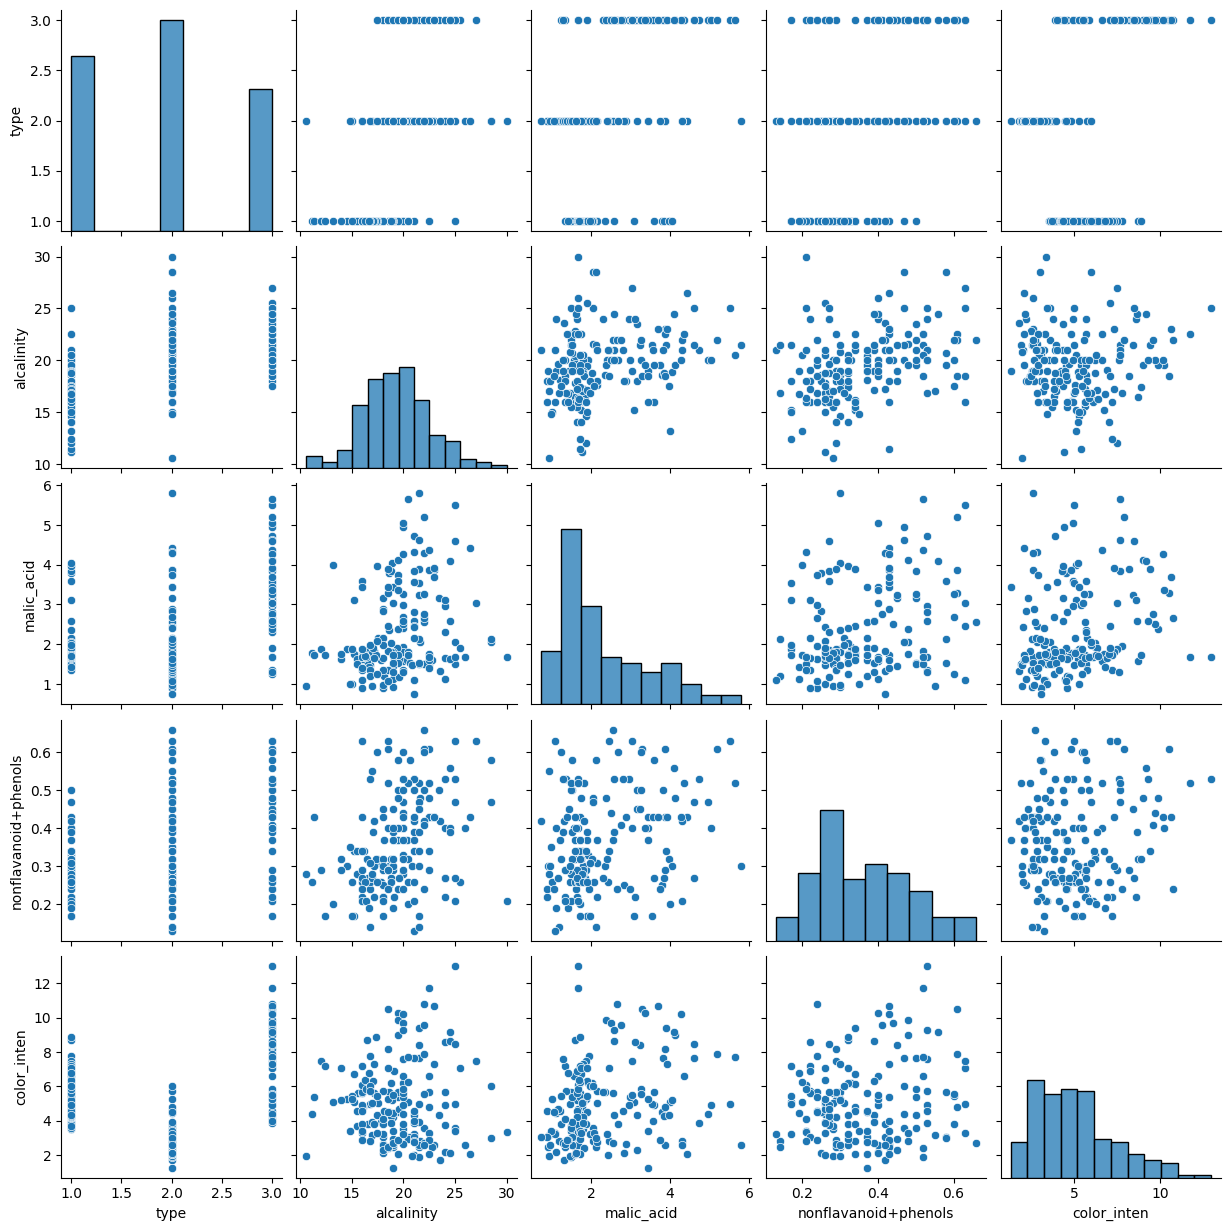

In [21]:
sns.pairplot(winedf2, kind="scatter")
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [23]:
y = winedf2["type"]
x = winedf2.drop("type", axis=1)

75 percent Training to 25 percent Test Data Split

In [24]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (133, 4) (133,)
Test set: 	 (45, 4) (45,)


# Classification 

## Decision Tree Method

In [25]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [26]:
train_pred = dectree.predict(xTest)
wine_train_pred = pd.DataFrame(data = train_pred, columns = ["type"])
wine_train_pred.head(10)

,type
0,1
1,1
2,3
3,2
4,1
5,1
6,1
7,3
8,2
9,1


In [27]:
## Accuracy of Model
print("Classification Accuracy \t: ", dectree.score(xTrain,yTrain))
dtAccuracy = accuracy_score(yTest,wine_train_pred)
print(f"The accuracy of Decision Tree is {dtAccuracy}")

Classification Accuracy 	:  1.0
The accuracy of Decision Tree is 0.8666666666666667


In [28]:
dtFscore = f1_score(yTest,wine_train_pred, average = "weighted")
print(f"The F score of Decision Tree is {dtFscore}")

The F score of Decision Tree is 0.8665679012345678


In [29]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, wine_train_pred)
cm

array([[16,  2,  1],
       [ 1, 12,  0],
       [ 2,  0, 11]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

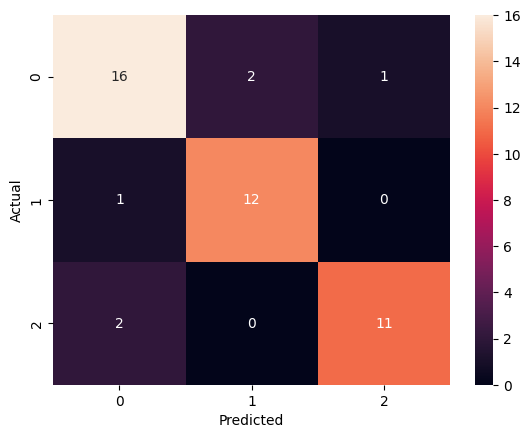

In [30]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest type", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type
0,16.0,1.73,0.29,5.600000,1
1,17.8,1.60,0.26,3.930000,1
2,23.0,3.70,0.43,10.680000,3
3,25.0,2.05,0.47,3.580000,1
4,20.5,1.81,0.26,5.100000,1
5,11.4,1.73,0.43,5.400000,1
6,18.1,1.21,0.37,4.600000,2
7,19.5,2.39,0.48,9.899999,3
8,20.0,2.68,0.60,3.800000,2
9,18.8,2.02,0.32,6.200000,1


In [32]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", wine_train_pred)
xTestDF.head(20)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type,Decision Tree
0,16.0,1.73,0.29,5.600000,1,1
1,17.8,1.60,0.26,3.930000,1,1
2,23.0,3.70,0.43,10.680000,3,3
3,25.0,2.05,0.47,3.580000,1,2
4,20.5,1.81,0.26,5.100000,1,1
5,11.4,1.73,0.43,5.400000,1,1
6,18.1,1.21,0.37,4.600000,2,1
7,19.5,2.39,0.48,9.899999,3,3
8,20.0,2.68,0.60,3.800000,2,2
9,18.8,2.02,0.32,6.200000,1,1


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier


index : 46 
Accuracy : 0.9333333333333333


Text(0, 0.5, 'Testing Accuracy')

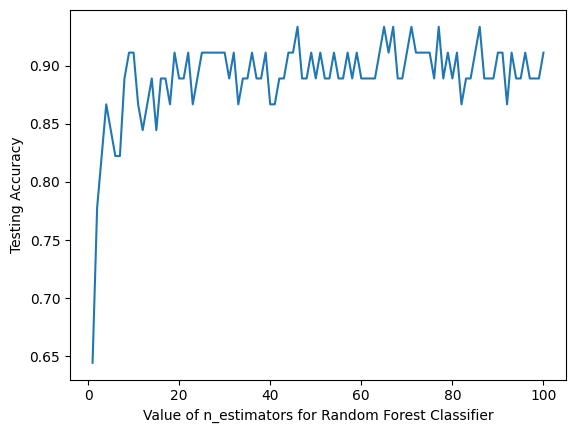

In [34]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [35]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=46)

In [36]:
model.score(xTest,yTest)

0.8666666666666667

In [37]:
rf_pred = model.predict(xTest)

In [38]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.8666666666666667
The F score of Random Forest is 0.865622032288699


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[17,  2,  0],
       [ 0, 12,  1],
       [ 3,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

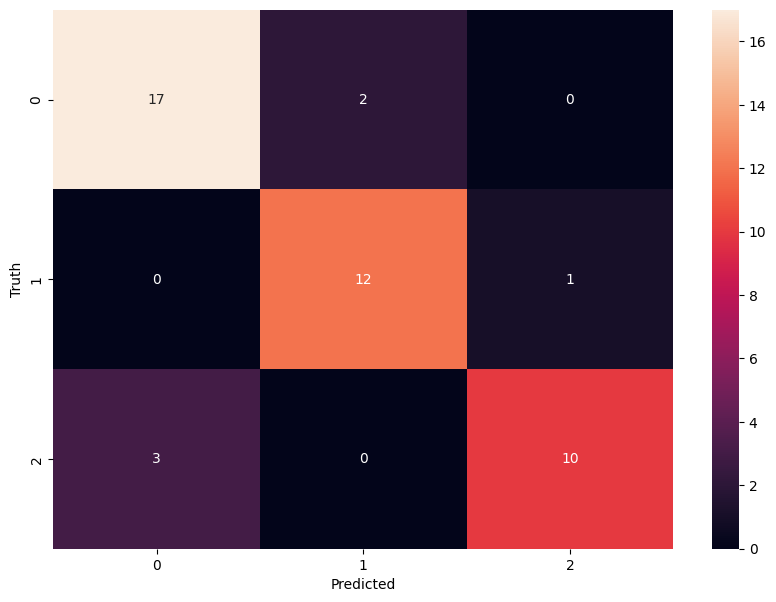

In [40]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
wine_rf_df = pd.DataFrame(data = rf_pred, columns = ["type"])
wine_rf_df.head(15)

,type
0,1
1,1
2,3
3,2
4,1
5,1
6,2
7,3
8,3
9,1


In [42]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", wine_rf_df)
xTestDF.head(20)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type,Decision Tree,Random Forest
0,16.0,1.73,0.29,5.600000,1,1,1
1,17.8,1.60,0.26,3.930000,1,1,1
2,23.0,3.70,0.43,10.680000,3,3,3
3,25.0,2.05,0.47,3.580000,1,2,2
4,20.5,1.81,0.26,5.100000,1,1,1
5,11.4,1.73,0.43,5.400000,1,1,1
6,18.1,1.21,0.37,4.600000,2,1,2
7,19.5,2.39,0.48,9.899999,3,3,3
8,20.0,2.68,0.60,3.800000,2,2,3
9,18.8,2.02,0.32,6.200000,1,1,1


## K-Nearest-Neighbour Classification

In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 1 
Accuracy : 0.8444444444444444


Text(0, 0.5, 'Testing Accuracy')

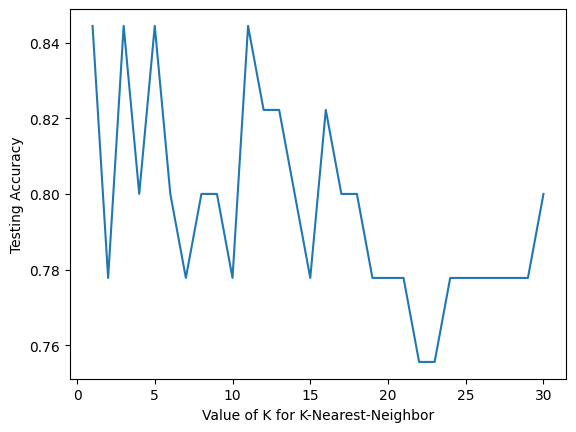

In [44]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [45]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=1)

Selected Kvalue = maxKValue as it provides on of the best testing accuracy

In [46]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[1 1 3 2 3 1 2 3 1 1 1 1 1 3 3 2 1 1 1 3 2 1 2 2 1 1 2 1 1 2 3 2 3 3 1 2 1
 2 2 2 3 3 2 1 3]


In [47]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of Random Forest is {knnAccuracy}")
print(f"The F score of Random Forest is {knnFscore}")

The accuracy of Random Forest is 0.8444444444444444
The F score of Random Forest is 0.8451687242798354


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[16,  2,  1],
       [ 2, 11,  0],
       [ 1,  1, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

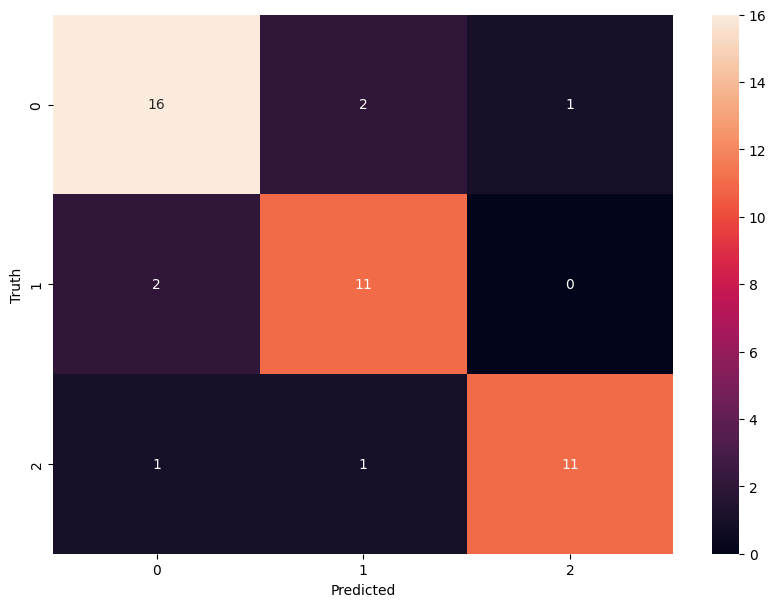

In [49]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [50]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["type"])
knnPredictedDF.head(10)

,type
0,1
1,1
2,3
3,2
4,3
5,1
6,2
7,3
8,1
9,1


In [51]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors
0,16.0,1.73,0.29,5.600000,1,1,1,1
1,17.8,1.60,0.26,3.930000,1,1,1,1
2,23.0,3.70,0.43,10.680000,3,3,3,3
3,25.0,2.05,0.47,3.580000,1,2,2,2
4,20.5,1.81,0.26,5.100000,1,1,1,3
5,11.4,1.73,0.43,5.400000,1,1,1,1
6,18.1,1.21,0.37,4.600000,2,1,2,2
7,19.5,2.39,0.48,9.899999,3,3,3,3
8,20.0,2.68,0.60,3.800000,2,2,3,1
9,18.8,2.02,0.32,6.200000,1,1,1,1


## Support Vector Machines

In [52]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [53]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[1 2 3 2 2 1 1 3 2 1 1 1 1 3 3 2 1 1 1 3 2 1 2 2 1 1 2 2 1 2 2 2 3 3 2 2 1
 2 2 2 3 3 2 1 1]


In [54]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.7333333333333333
The F score of Support Vector Machines is 0.7399130190796857


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[13,  6,  0],
       [ 2, 11,  0],
       [ 2,  2,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

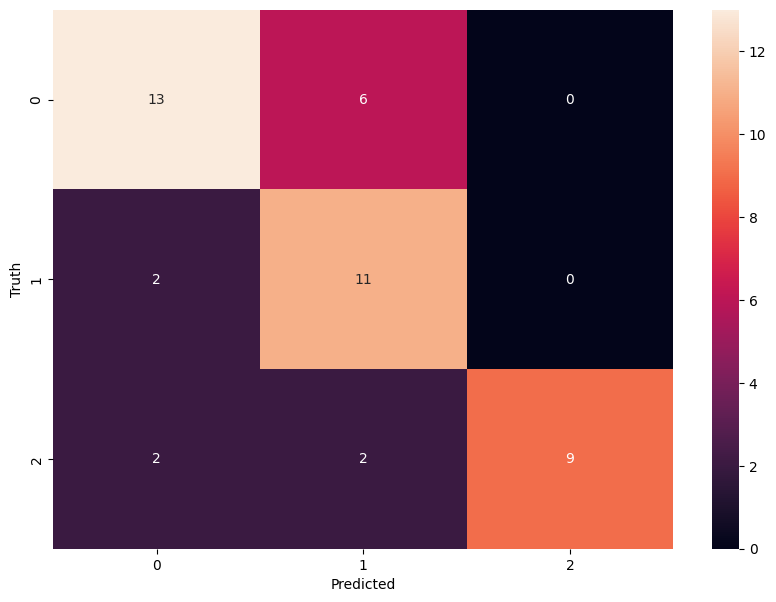

In [56]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [57]:
wine_svm_df = pd.DataFrame(data = svm_pred, columns = ["type"])
wine_svm_df.head(15)

,type
0,1
1,2
2,3
3,2
4,2
5,1
6,1
7,3
8,2
9,1


In [58]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", wine_svm_df)
xTestDF.head(20)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,16.0,1.73,0.29,5.600000,1,1,1,1,1
1,17.8,1.60,0.26,3.930000,1,1,1,1,2
2,23.0,3.70,0.43,10.680000,3,3,3,3,3
3,25.0,2.05,0.47,3.580000,1,2,2,2,2
4,20.5,1.81,0.26,5.100000,1,1,1,3,2
5,11.4,1.73,0.43,5.400000,1,1,1,1,1
6,18.1,1.21,0.37,4.600000,2,1,2,2,1
7,19.5,2.39,0.48,9.899999,3,3,3,3,3
8,20.0,2.68,0.60,3.800000,2,2,3,1,2
9,18.8,2.02,0.32,6.200000,1,1,1,1,1


## Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(64,), random_state=1,activation = "relu", max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [60]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[1 1 3 2 1 1 1 3 2 1 2 1 1 3 3 2 1 1 1 3 2 3 2 2 1 1 2 1 1 2 3 2 3 3 1 2 3
 2 2 2 3 3 2 1 3]


In [61]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.8888888888888888
The F score of Neural Network is 0.8895943562610229


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[16,  2,  1],
       [ 1, 12,  0],
       [ 0,  1, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

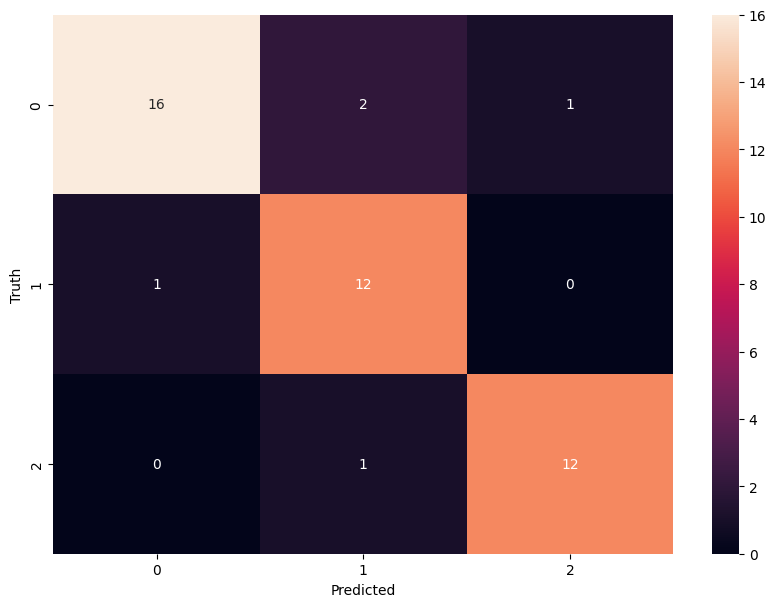

In [63]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [64]:
wine_nn_df = pd.DataFrame(data = nn_pred, columns = ["type"])
wine_nn_df.head(15)

,type
0,1
1,1
2,3
3,2
4,1
5,1
6,1
7,3
8,2
9,1


In [65]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", wine_nn_df)
xTestDF.head(20)

,alcalinity,malic_acid,nonflavanoid+phenols,color_inten,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,16.0,1.73,0.29,5.600000,1,1,1,1,1,1
1,17.8,1.60,0.26,3.930000,1,1,1,1,2,1
2,23.0,3.70,0.43,10.680000,3,3,3,3,3,3
3,25.0,2.05,0.47,3.580000,1,2,2,2,2,2
4,20.5,1.81,0.26,5.100000,1,1,1,3,2,1
5,11.4,1.73,0.43,5.400000,1,1,1,1,1,1
6,18.1,1.21,0.37,4.600000,2,1,2,2,1,1
7,19.5,2.39,0.48,9.899999,3,3,3,3,3,3
8,20.0,2.68,0.60,3.800000,2,2,3,1,2,2
9,18.8,2.02,0.32,6.200000,1,1,1,1,1,1


# Evaluation Metrics of Machine Learning Algorithms

In [66]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore],
                   "SVM" : [svmAccuracy , svmFscore],
                   "NN" : [nnAccuracy, nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree" , "SVM" ,"NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.844444,0.866667,0.866667,0.733333,0.888889
Fscore,0.845169,0.865622,0.866568,0.739913,0.889594
